In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree


In [2]:
salesdata=pd.read_csv('rossmann.csv')
salesdata.info()

C:\Users\Gomathy\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null object
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [3]:
storesdata=pd.read_csv('rossmann_stores.csv')
storesdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
Store                        1115 non-null int64
StoreType                    1115 non-null object
Assortment                   1115 non-null object
CompetitionDistance          1112 non-null float64
CompetitionOpenSinceMonth    761 non-null float64
CompetitionOpenSinceYear     761 non-null float64
Promo2                       1115 non-null int64
Promo2SinceWeek              571 non-null float64
Promo2SinceYear              571 non-null float64
PromoInterval                571 non-null object
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [4]:
##Getting year and month from the date of salesdata
salesdata['Year']=pd.DatetimeIndex(salesdata['Date']).year
salesdata['Month']=pd.DatetimeIndex(salesdata['Date']).month

In [5]:
"""As more than 10% data is missing in CompetitionOpenSinceMonth,CompetitionOpenSinceYear,
Promo2SinceWeek,Promo2SinceYear,PromoInterval, we're dropping those variables.Also the "Promo2" 
variable s for storewise,but on merging salesdata with storesdata,the salesdata has promo
happened datewise.Hence dropping "Promo2" in the storesdata table."""
storesdata_copy=storesdata.copy()
storesdata.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear',\
                 'PromoInterval','Promo2'],axis=1,inplace=True)


storesdata.fillna(0,inplace=True)  ##Filling the NAs in "competitionDistance "  with 0.As it has only 3 NAs in it.

new=salesdata.merge(storesdata,on='Store',how='left') ## Creating a new df by merging storesdata and salesdata
# new_df=new[new['Open']==1]  ##Considering only Store open days
new_df=new.copy()

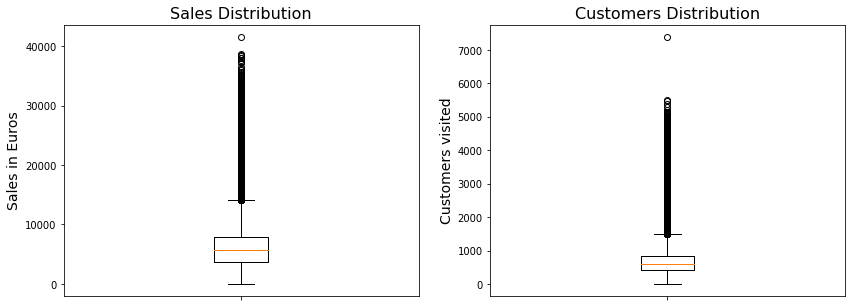

In [6]:
##Boxplot for sales  and customers distribution

# plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize']=[14,5]
fig,ax=plt.subplots(1,2)

ax[0].boxplot(new_df['Sales'])
ax[0].set_title("Sales Distribution",fontsize=16)
ax[0].set_ylabel("Sales in Euros",fontsize=14)
ax[0].set_xticklabels([],fontsize=14)

ax[1].boxplot(new_df['Customers'])
ax[1].set_title("Customers Distribution",fontsize=16)
ax[1].set_ylabel("Customers visited",fontsize=14);
ax[1].set_xticklabels([],fontsize=14);

In [7]:
new_df[['Sales','Customers']].describe()[1:8]

,Sales,Customers
mean,5773.818972,633.145946
std,3849.926175,464.411734
min,0.000000,0.000000
25%,3727.000000,405.000000
50%,5744.000000,609.000000
75%,7856.000000,837.000000
max,41551.000000,7388.000000


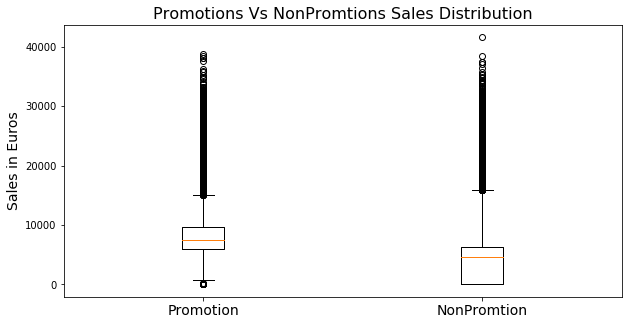

In [8]:
##Considering Promotion and non-promotion days sales

promo=new_df[(new_df['Promo']==1) ]['Sales']
no_promo=new_df[(new_df['Promo']==0) ]['Sales']


##Box plot of Promotion and non-promotion sales
plt.rcParams['figure.figsize']=[10,5]

plt.boxplot([promo,no_promo])
plt.xticks(range(1,3),["Promotion","NonPromtion"],fontsize=14)
plt.ylabel("Sales in Euros",fontsize=14)
plt.title("Promotions Vs NonPromtions Sales Distribution",fontsize=16);

In [9]:
a=pd.Series(promo.describe())
b=pd.Series(no_promo.describe())
pd.DataFrame({'Promtion Sales':a, 'Non-Promotion Sales':b})
# a.columns({'Sales':'Promtion'})


,Promtion Sales,Non-Promotion Sales
count,388080.000000,629129.000000
mean,7991.152046,4406.050805
std,3419.025495,3442.450020
min,0.000000,0.000000
25%,5922.000000,0.000000
50%,7553.000000,4622.000000
75%,9603.000000,6367.000000
max,38722.000000,41551.000000


In [10]:
new_df.groupby(['Promo'])['Open'].value_counts()

Promo  Open
0      1       467496
       0       161633
1      1       376896
       0        11184
Name: Open, dtype: int64

In [11]:
monthlist=range(1,13)
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

##Considering the promotion and non promotion  averagesales of 2013 monthwise  
salesdata2013=new_df[new_df['Year']==2013]
promo_2013=salesdata2013[(salesdata2013['Promo']==1)]
nopromo_2013=salesdata2013[(salesdata2013['Promo']==0)]
promo_2013_month=promo_2013.groupby('Month')
promo_2013_month_sales=promo_2013_month['Sales'].mean()
nopromo_2013_month=nopromo_2013.groupby('Month')
nopromo_2013_month_sales=nopromo_2013_month['Sales'].mean()

##Considering the promotion and non promotion  averagesales of 2014 monthwise  

salesdata2014=new_df[new_df['Year']==2014]
promo_2014=salesdata2014[(salesdata2014['Promo']==1)]
nopromo_2014=salesdata2014[(salesdata2014['Promo']==0)]
promo_2014_month=promo_2014.groupby('Month')
promo_2014_month_sales=promo_2014_month['Sales'].mean()
nopromo_2014_month=nopromo_2014.groupby('Month')
nopromo_2014_month_sales=nopromo_2014_month['Sales'].mean()
    



# promo_2013_month=promo_2013.groupby('Month')
# promo_2013_month_sales=promo_2013_month['Sales'].mean()
# nopromo_2013_month=nopromo_2013.groupby('Month')
# nopromo_2013_month_sales=nopromo_2013_month['Sales'].mean()


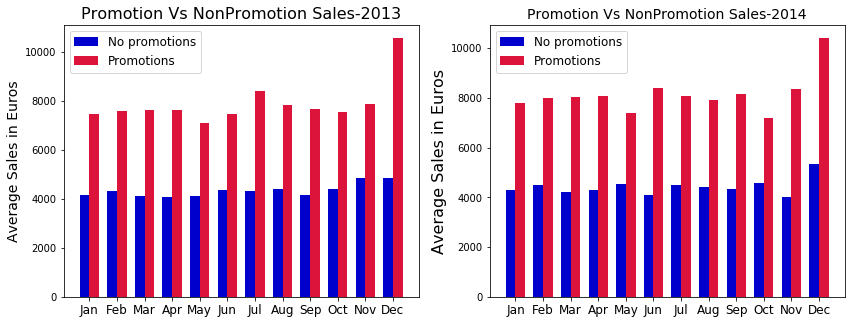

In [12]:

##Box plot for promotional and non promotional sales for 2013 and 2014 monthwise
plt.rcParams['figure.figsize']=[14,5]

fig,ax=plt.subplots(1,2)
ax[0].bar(monthlist,nopromo_2013_month_sales,width=-.35,align='edge',label='No promotions',color='mediumblue')

ax[0].bar(monthlist,promo_2013_month_sales,width=0.35,align='edge',label='Promotions',color='crimson')
ax[0].legend(fontsize=12)
ax[0].set_xticks(monthlist)
ax[0].set_xticklabels((month),fontsize=12)
ax[0].set_title("Promotion Vs NonPromotion Sales-2013",fontsize=16)
ax[0].set_ylabel("Average Sales in Euros",fontsize=14)



ax[1].bar(monthlist,nopromo_2014_month_sales,width=-0.35,align='edge',label='No promotions',color='mediumblue')

ax[1].bar(monthlist,promo_2014_month_sales,width=0.35,align='edge',label='Promotions',color='crimson')
ax[1].legend(fontsize=12)
ax[1].set_xticks(monthlist)

ax[1].set_xticklabels((month),fontsize=12)
ax[1].set_ylabel("Average Sales in Euros",fontsize=16)

ax[1].set_title("Promotion Vs NonPromotion Sales-2014",fontsize=14);

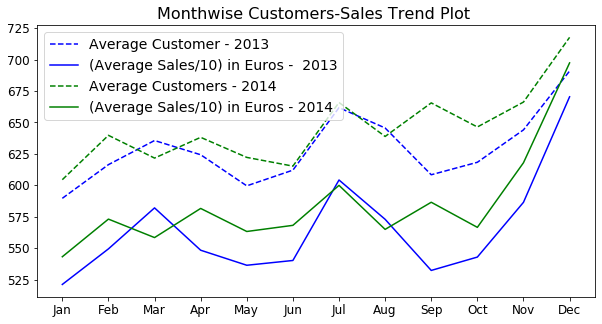

In [13]:
##Plotting monthly trend of Avg Sales vs Customer monthwise for 2013 and 2014
plt.rcParams['figure.figsize']=[10,5]

sales_2013_month=salesdata2013.groupby('Month')['Sales'].mean()
customer_2013_monthwise=salesdata2013.groupby('Month')['Customers'].mean()
sales_2014_month=salesdata2014.groupby('Month')['Sales'].mean()
customer_2014_monthwise=salesdata2014.groupby('Month')['Customers'].mean()

plt.plot(month,customer_2013_monthwise,'b--',label='Average Customer - 2013')
plt.plot(month,sales_2013_month/10,'b-',label='(Average Sales/10) in Euros -  2013')
plt.plot(month,customer_2014_monthwise,'g--',label='Average Customers - 2014')
plt.plot(month,sales_2014_month/10,'g-',label='(Average Sales/10) in Euros - 2014')
plt.title("Monthwise Customers-Sales Trend Plot ",fontsize=16)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.legend(fontsize=14);

In [14]:
new.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,StoreType,Assortment,CompetitionDistance
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,c,a,1270.0
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,a,a,570.0
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,a,a,14130.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,c,c,620.0
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,a,a,29910.0


In [15]:
new_df[new_df['Sales']==new_df['Sales'].max()]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,StoreType,Assortment,CompetitionDistance
44393,909,1,2015-06-22,41551,1721,1,0,0,0,2015,6,a,c,1680.0


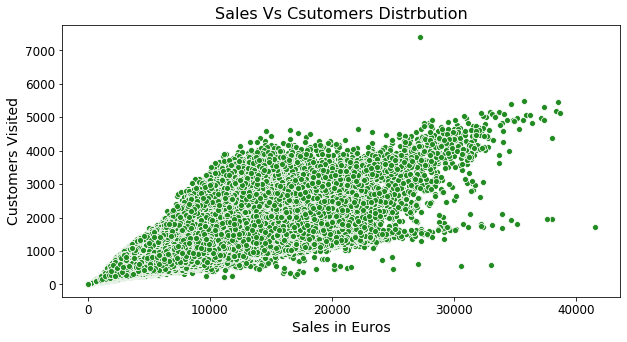

In [16]:
##Scatter plot of Customers Vs Average Sales

gg=sns.scatterplot(x=new_df['Sales'],y=new_df['Customers'],color='forestgreen')
plt.xlabel("Sales in Euros",fontsize=14)
plt.ylabel("Customers Visited",fontsize=14)
plt.title("Sales Vs Csutomers Distrbution",fontsize=16)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show(gg);

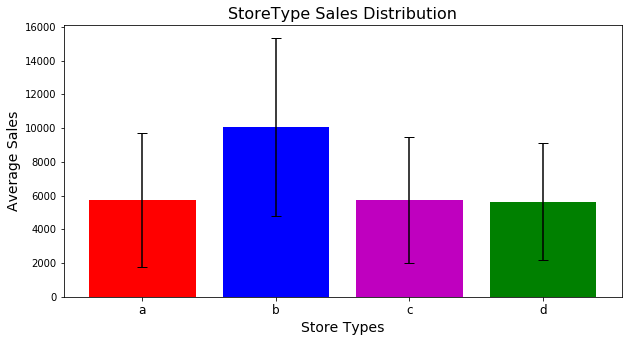

In [17]:
storetype_filtered=new.groupby('StoreType')
# sns.barplot('StoreType','Sales',data=new)
plt.bar(range(1,5),storetype_filtered['Sales'].mean(),\
        color=['r','b','m','g'],yerr=storetype_filtered['Sales'].std(),capsize=5)
plt.xticks(range(1,5),['a','b','c','d'],fontsize=12)
plt.title('StoreType Sales Distribution',fontsize=16)
plt.xlabel("Store Types",fontsize=14)
plt.ylabel("Average Sales",fontsize=14);

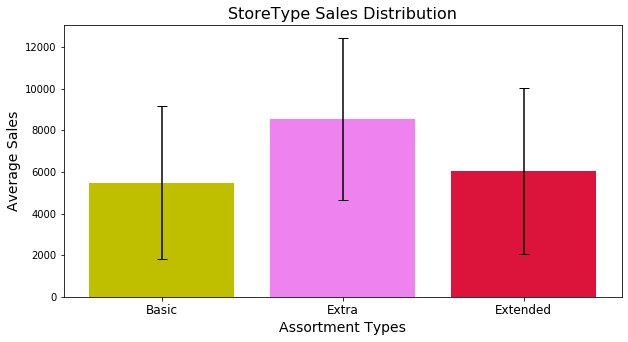

In [18]:
assortmenttype_filtered=new.groupby('Assortment')
plt.bar(range(1,4),assortmenttype_filtered['Sales'].mean(),\
        color=['y','violet','crimson'],yerr=assortmenttype_filtered['Sales'].std(),capsize=5)
plt.xticks(range(1,4),['Basic','Extra','Extended'],fontsize=12)
plt.title('StoreType Sales Distribution',fontsize=16)
plt.xlabel("Assortment Types",fontsize=14)
plt.ylabel("Average Sales",fontsize=14);

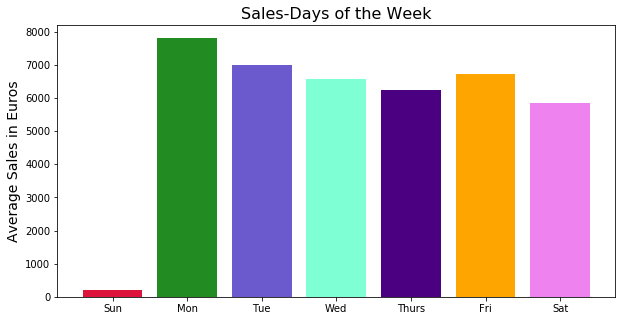

In [19]:

plt.rcParams['figure.figsize']=[14,5]

# fig,ax=plt.subplots(1,2)
day_sales=new_df.groupby('DayOfWeek')['Sales'].mean()
plt.rcParams['figure.figsize']=[10,5]
daylist=['Mon','Tue','Wed','Thurs','Fri','Sat','Sun']
dummy={}
for i in range(1,8):
    dummy[daylist[i-1]]=(day_sales[i])

daysofweek=['Sun','Mon','Tue','Wed','Thurs','Fri','Sat']
pltlist=[]
for j in daysofweek:
    pltlist.append(dummy[j])
plt.bar(daysofweek,pltlist,color=['crimson','forestgreen','slateblue','aquamarine','indigo','orange','violet'])
# ax[0].set_xticklabels(fontsize=14)
plt.ylabel("Average Sales in Euros",fontsize=14)
plt.title("Sales-Days of the Week",fontsize=16);


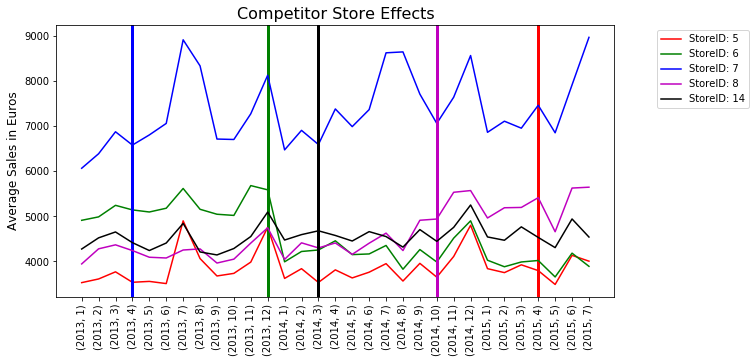

In [20]:
comp_details=storesdata_copy[storesdata_copy['CompetitionOpenSinceYear']>=2013][['Store','CompetitionOpenSinceMonth','CompetitionOpenSinceYear']]

# storesdata_copy
comp_details['CompetitionOpenSinceMonth']=comp_details['CompetitionOpenSinceMonth'].astype('int')
comp_details['CompetitionOpenSinceYear']=comp_details['CompetitionOpenSinceYear'].astype('int')
store_id = comp_details['Store'][:5].values
plt.rcParams['figure.figsize']=[10,5]
average_store_sales=[]
y=[]
m=[]
fig=plt.figure   ##Plotting the figure
ax=plt.axes() 
for i in store_id:
    store_data = new_df[new_df["Store"] == i]
    cmd=store_data.groupby(['Year','Month'])["Sales"].mean()
    average_store_sales.append( cmd)
    y.append(storesdata_copy["CompetitionOpenSinceYear"].loc[storesdata_copy["Store"]  == i].values[0])
    m.append(storesdata_copy["CompetitionOpenSinceMonth"].loc[storesdata_copy["Store"] == i].values[0])
cc=['r','g','b','m','k','y','orange','violet','skyblue','sienna']
for j in range(len(average_store_sales)):
    ax.plot(range(1,32),average_store_sales[j],color=cc[j],label="StoreID: "+str(store_id[j]))
    plt.legend(bbox_to_anchor=[0.75,0.5,0.5,0.5])
    if (y[j] >= 2013 )and (y[j] == y[j]) and (m[j] == m[j]):
        plt.axvline(x=((y[j]-2013) * 12) + (m[j] ), linewidth=3,color=cc[j])
plt.title("Competitor Store Effects",fontsize=16)

plt.xticks(range(1,32),cmd.index.values,rotation=90)
plt.ylabel("Average Sales in Euros",fontsize=12);


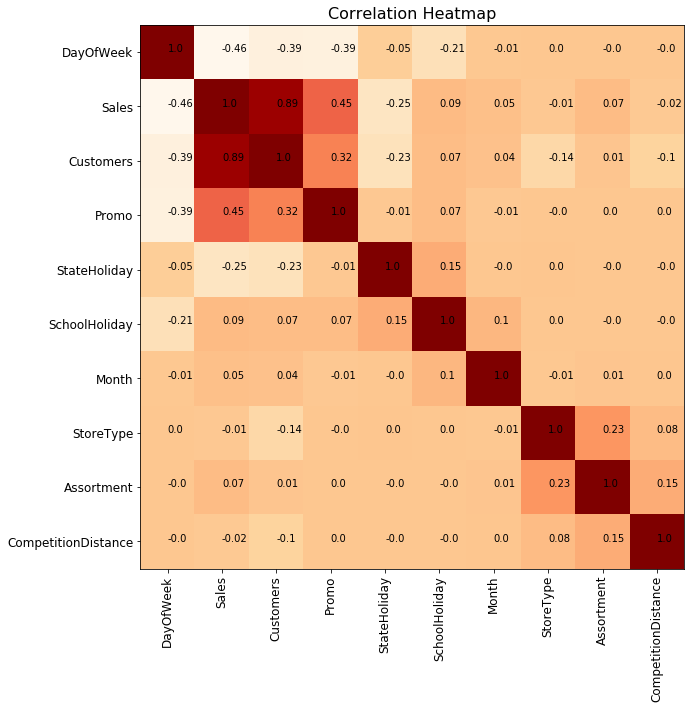

In [21]:
##Plotting  Correlation matrix as heat map
new.drop(['Year','Store','Open'],inplace=True,axis=1)
cleanup_nums = {"StoreType":     {"a": 1, "b": 2,"c":3,"d":4},
                "Assortment": {"a": 1, "b": 2, "c": 3 },
               "StateHoliday":{"0":0,"a":1,"b":1,"c":1}}
new.replace(cleanup_nums, inplace=True)

corr_all=new.corr()
plt.rcParams['figure.figsize']=[10,10]
mat=new.corr()
fig, ax = plt.subplots()
ax.imshow(mat, cmap='OrRd') # making the heat-map image 
ax.set_xticks(np.arange(10)) # define tick-mark positions
ax.set_yticks(np.arange(10))
ax.set_xticklabels(corr_all.columns,fontsize=12, rotation = 90) # label ticks 
ax.set_yticklabels(corr_all.columns,fontsize=12) 
ax.set_ylim(len(corr_all.columns)-0.5, -0.5) 
for i in np.arange(10): # Loop over data dimensions and create text annotations:
    for j in np.arange(10):
#         print(i,j)
        text = ax.text(j, i, round(corr_all[corr_all.columns[i]][j],2),  color="k")
plt.title("Correlation Heatmap",fontsize=16);


# new.head()

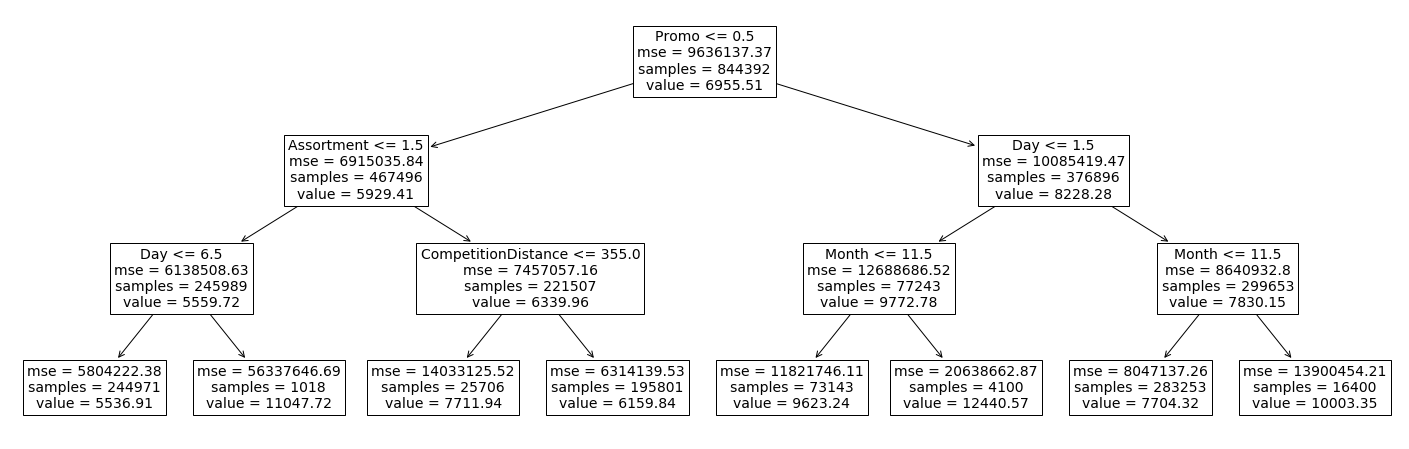

In [22]:
#Recoding categorical variables into numerical values

cleanup_nums = {"StoreType":     {"a": 1, "b": 2,"c":3,"d":4},
                "Assortment": {"a": 1, "b": 2, "c": 3 },
               "StateHoliday":{"0":0,"a":1,"b":1,"c":1}}
new_df.replace(cleanup_nums, inplace=True)

nn=new_df[(new_df['Open']==1) ]  ##Considering only store open days

##Forming the feature matrix and response variable
XX=[nn['DayOfWeek'].values,nn['Promo'].values,nn['StateHoliday'].values,\
    nn['SchoolHoliday'].values,nn['Month'].values,nn['StoreType'].values,nn['Assortment'].values,nn['CompetitionDistance'].values]
XX_new=np.array(XX).T
Y=nn['Sales']
plt.rcParams['figure.figsize']=[10,5]

##Fitting the Regression tree
regr_2 = DecisionTreeRegressor(max_depth=3)
regr_2.fit(XX_new, Y.values)

##Plotting the tree
plt.rcParams['figure.figsize']=[25,8]
tree.plot_tree(regr_2.fit(XX_new, Y.values),feature_names=\
               ['Day','Promo','Stateholiday','SchoolHoliday','Month','Storetype','Assortment','CompetitionDistance'],fontsize=14,precision=2);

